## Pregunta 2
Se presenta a continuación el desarrollo de la pregunta 2 usando el dataset proporcionado con información de pingüinos.

A partir de estos datos realiza las siguientes operaciones:
Elabora un programa en Python que utilice el modelo de máquina de vector de soporte con kernel para solucionar dicha problemática.
Compara los resultados obtenidos modificando el tipo de kernel.
Evalúa la precisión de los modelos para cada caso.

In [51]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#importando sklearn para el modelo de máquina de vector de soporte
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [53]:
#preparando los datos
#importando el dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/janus78/MasterIA-Notebooks_Tetra3/master/penguins_size.csv')
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [54]:
#Eliminando los NaN
dataset.dropna(inplace=True)
#Eliminando columnas que no se necesitan
dataset.drop(['island', 'sex'], axis=1, inplace=True)
dataset.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


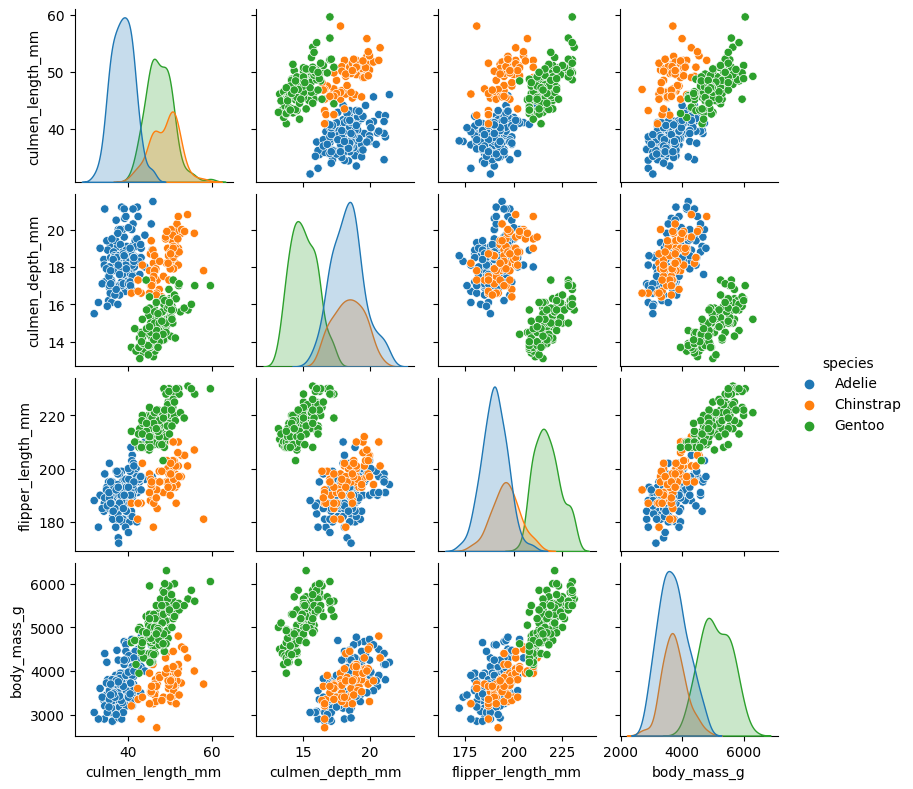

In [55]:
#Graficando las especies y el resto de valores
sns.pairplot(dataset, hue="species", height=2)

In [56]:
#Codificando los datos de species para hacerlo variable categorica
label_encoder = LabelEncoder()
dataset['species_codificada'] = label_encoder.fit_transform(dataset['species'])
dataset.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_codificada
0,Adelie,39.1,18.7,181.0,3750.0,0
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
4,Adelie,36.7,19.3,193.0,3450.0,0
5,Adelie,39.3,20.6,190.0,3650.0,0


In [57]:
#Separando los datos en variables de entrenamiento y prueba
X = dataset.drop(['species_codificada', 'species'], axis=1)
y = dataset['species_codificada']
#Normalizando los datos de características
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
#Usando el kernel linear para el modelo de máquina de vector de soporte
C=1.0 #Cantidad de restricciones
svc = SVC(kernel='linear' , C=C)

In [59]:
#Entrenando el modelo de máquina de vector de soporte
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [60]:
#Prediciendo los datos de prueba
y_pred = svc.predict(X_test)

In [61]:
#Evaluando el modelo
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00        21

    accuracy                           0.97        67
   macro avg       0.98      0.93      0.95        67
weighted avg       0.97      0.97      0.97        67



In [62]:
#Evaluando el modelo con el kernel rbf
svcRBF = SVC(kernel='rbf' , C=C)

In [63]:
#Entrenando el modelo de máquina de vector de soporte
svcRBF.fit(X_train, y_train)

SVC()

In [64]:
#Prediciendo los datos de prueba
y_pred_RBF = svcRBF.predict(X_test)

In [65]:
#Evaluando el modelo
print(metrics.classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00        21

    accuracy                           0.97        67
   macro avg       0.98      0.93      0.95        67
weighted avg       0.97      0.97      0.97        67



In [66]:
#Evaluando el modelo con el kernel sigmoide
svcSigmoide = SVC(kernel='sigmoid' , C=C)

In [67]:
#Entrenando el modelo de máquina de vector de soporte
svcSigmoide.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [68]:
#Prediciendo los datos de prueba
y_pred_sigmoide= svcSigmoide.predict(X_test)

In [83]:
#Evaluando el modelo
print(metrics.classification_report(y_test, y_pred_sigmoide))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00        21

    accuracy                           0.97        67
   macro avg       0.98      0.93      0.95        67
weighted avg       0.97      0.97      0.97        67



In [84]:
#Evaluando el modelo con el kernel poly
svcPoly = SVC(kernel='poly' , C=C)

In [85]:
#Entrenando el modelo de máquina de vector de soporte
svcPoly.fit(X_train, y_train)

SVC(kernel='poly')

In [86]:
#Prediciendo los datos de prueba
y_pred_poly= svcPoly.predict(X_test)

In [87]:
#Evaluando el modelo
print(metrics.classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.67      0.80         9
           2       1.00      1.00      1.00        21

    accuracy                           0.96        67
   macro avg       0.97      0.89      0.92        67
weighted avg       0.96      0.96      0.95        67



In [103]:
#Graficando X_test con el y_test para el primer kernel que fue el linear
newDf_test = pd.DataFrame(X_test)
newDf_test['species'] = y_test.to_numpy()
newDf_test.head()

,0,1,2,3,species
0,-0.292409,0.071004,-1.429521,-0.757882,1
1,-1.227787,0.325462,-0.715295,-1.068970,0
2,-1.136083,0.579920,-1.929480,-1.006752,0
3,0.496243,-0.946827,1.284538,1.233083,2
4,1.376599,0.783487,-1.000986,-1.193405,1


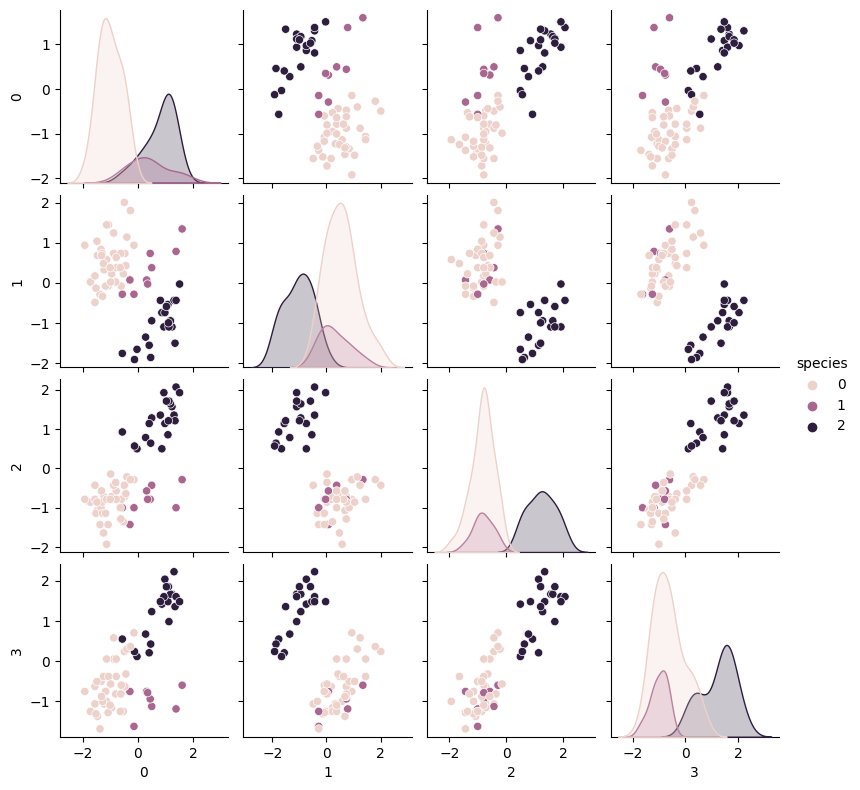

In [104]:
sns.pairplot(newDf_test, hue="species", height=2)

In [105]:
#graficando el X_test con el y_pred para el primer kernel que fue el linear
newDf_pred = pd.DataFrame(X_test)
newDf_pred['species'] = y_pred
newDf_pred.head()

,0,1,2,3,species
0,-0.292409,0.071004,-1.429521,-0.757882,0
1,-1.227787,0.325462,-0.715295,-1.068970,0
2,-1.136083,0.579920,-1.929480,-1.006752,0
3,0.496243,-0.946827,1.284538,1.233083,2
4,1.376599,0.783487,-1.000986,-1.193405,1


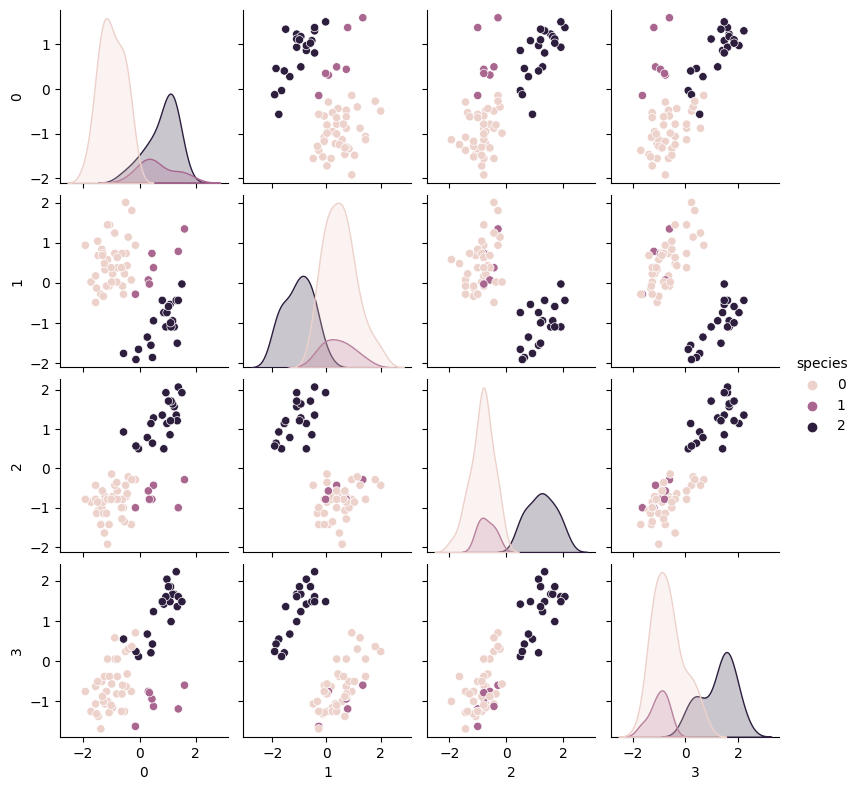

In [106]:
sns.pairplot(newDf_pred, hue="species", height=2)

Podemos notar que los resultados en las métricas entre los diferentes tipos de kernel en este caso fueron similares con exepción del kernel polinomial que tuvo un poco menos de valor en precisión, lo cual se ha comprobado al graficar el primer kernel lineal usando sus datos de prueba y predichos.
